In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
path = '../../day1/amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(path)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


**Part 1: Analyzing Best-Seller Trends Across Product Categories**

In [51]:
#1. Crosstab Analysis:
# Create a crosstab between the product category and the isBestSeller status.
# Are there categories where being a best-seller is more prevalent?

crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])#.reset_index()
crosstab_result = crosstab_result.sort_values(by=True, ascending=False)
crosstab_result = crosstab_result.head(20)
top_20_categories = crosstab_result.index
type(top_20_categories)
# It appears as though best sellers are more prevalent in the grocery and health & personal care categories

pandas.core.indexes.base.Index

In [46]:
# Statistical Tests:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.

from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)
display(chi2_statistic, chi2_p_value)

from scipy.stats.contingency import association
association(crosstab_result, method="cramer")

19351.044232348286

0.0

0.1521337002797535

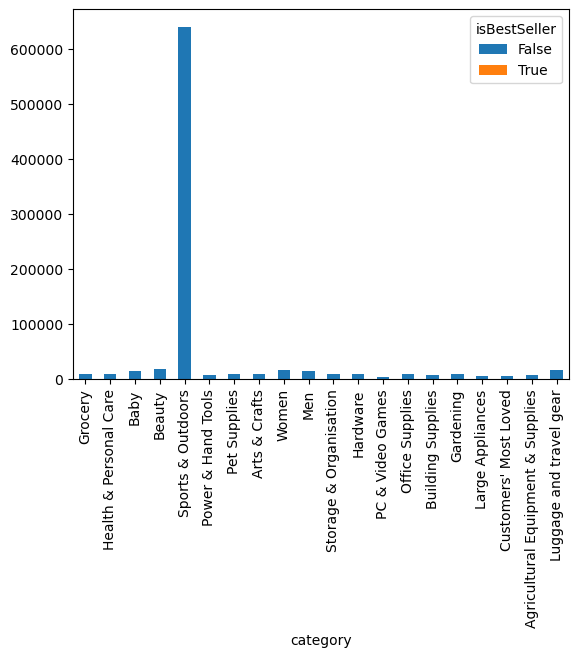

In [47]:
# 3. Visualizations
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

crosstab_result.plot(kind="bar", stacked=True);

**Part 2: Exploring Product Prices and Ratings Across Categories and Brands**

In [48]:
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    return outliers


data_series = df.price
outliers = tukeys_test_outliers(data_series)
df = df.drop(index=outliers.index)
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443640,2828581,B0BX2KM9KQ,Motorcycle Socks 2 Pairs I'd Rather be on My M...,0.0,0,10.99,False,0,Motorbike Clothing
2443642,2828585,B07DCFQMQL,Speed MaxX BODY ARMOUR CE MOTORBIKE/MOTORCYCLE...,3.6,66,49.99,False,0,Motorbike Clothing
2443644,2828587,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2443645,2828588,B0BQMXJPP5,Helmet Ponytail Pigtails Twist Braids Hair wit...,0.0,0,19.99,False,0,Motorbike Clothing


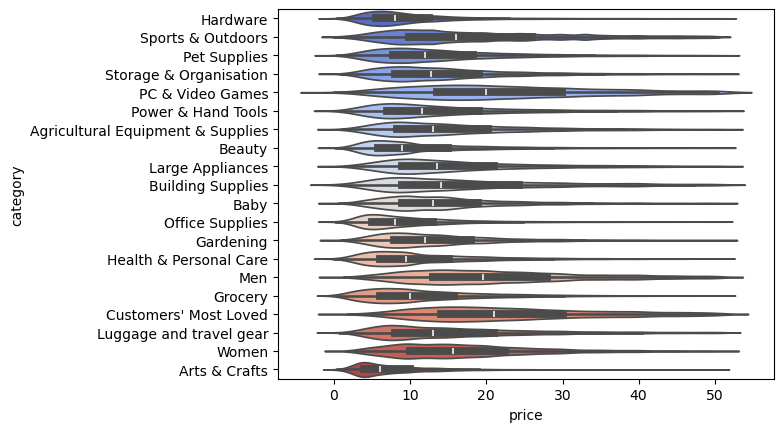

In [55]:
# 1. Violin Plots:
# Use a violin plot to visualize the distribution of price across different product categories.
# Filter out the top 20 categories based on count for better visualization.
# Which product category tends to have the highest median price? Don't filter here by top categories.

filtered_df = df[df.category.isin(top_20_categories)]
sns.violinplot(data=filtered_df, y='category', x='price', palette="coolwarm", hue='category', legend=False)

# The 'customers' most loved' category has the highest median price.

,category,price
133,Hockey Shoes,41.125128
55,Computer Cases,37.673797
108,Graphics Cards,37.204118
192,Motorbike Batteries,36.355793
201,"Motorbike Handlebars, Controls & Grips",35.918318
...,...,...
22,Bedding Accessories,8.835220
4,Adapters,8.519249
246,Signs & Plaques,8.160817
8,Arts & Crafts,7.885987


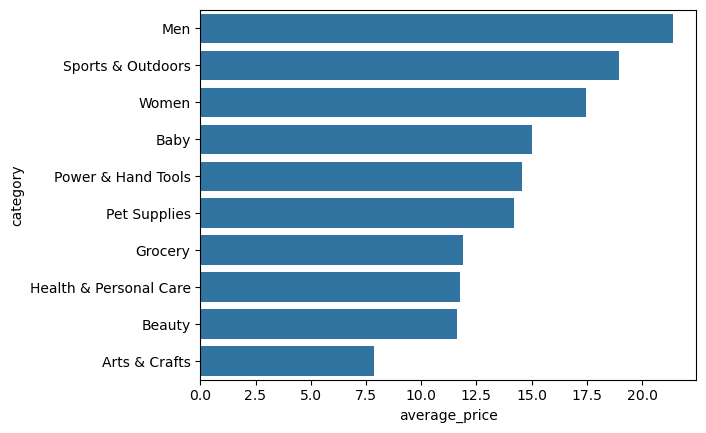

In [75]:
# 2. Bar Charts:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Which product category commands the highest average price? Don't filter here by top categories.

top_10_categories = crosstab_result.head(10)
top_10_category_index = top_10_categories.index
top_10_category_index

filtered_df = df[df.category.isin(top_10_category_index)]
mean_price_by_category = filtered_df.groupby('category')['price'].mean().reset_index().sort_values(by='price', ascending=False)
mean_price_by_category = mean_price_by_category.rename(columns={'price': 'average_price'})

sns.barplot(mean_price_by_category, y='category', x='average_price')

# The men's category holds the highest average price amongst the top 10 categories.

mean_price_by_category_all = df.groupby('category')['price'].mean().reset_index().sort_values(by='price', ascending=False)
mean_price_by_category_all

# The hockey shoes category holds the highest average price amongst all categories.

,category,stars
56,Computer Memory,4.6
132,Hobbies,4.6
157,Kids' Play Figures,4.6
151,Jigsaws & Puzzles,4.6
209,Office Paper Products,4.6
...,...,...
129,Hi-Fi Receivers & Separates,0.0
121,Handmade Kitchen & Dining,0.0
120,Handmade Jewellery,0.0
119,Handmade Home Décor,0.0


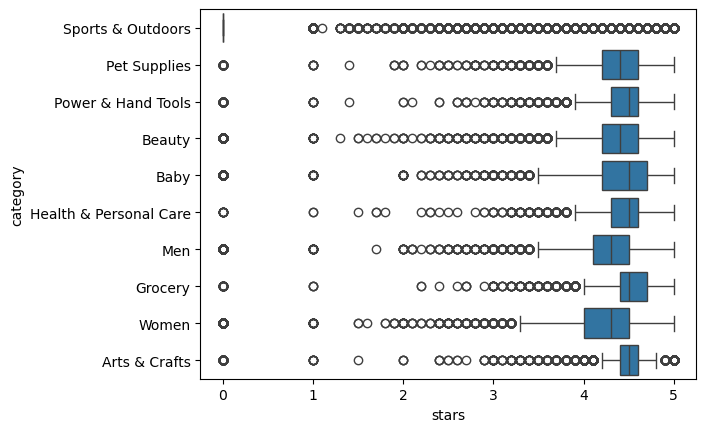

In [79]:
# 3. Box Plots:
# Visualize the distribution of product ratings based on their category using side-by-side box plots.
# Filter out the top 10 categories based on count for better visualization.
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

sns.boxplot(filtered_df, y='category', x='stars')

median_ratings_by_category = df.groupby('category')['stars'].median().reset_index().sort_values(by='stars', ascending=False)
median_ratings_by_category

# Multiple categories share the highest median - Computer Memory, Hobbies, Kids Play Figures etc.

**Part 3: Investigating the Interplay Between Product Prices and Ratings**\
Objective: Analyze how product ratings (`stars`) correlate with product `prices`.

In [81]:
# 1. Correlation Coefficients:
# Calculate the correlation coefficient between price and stars.
# Is there a significant correlation between product price and its rating?

correlation = df.price.corr(df.stars)
correlation

# There appears to be no correlation between price and stars.

-0.04771902282531108

<Axes: xlabel='stars', ylabel='price'>

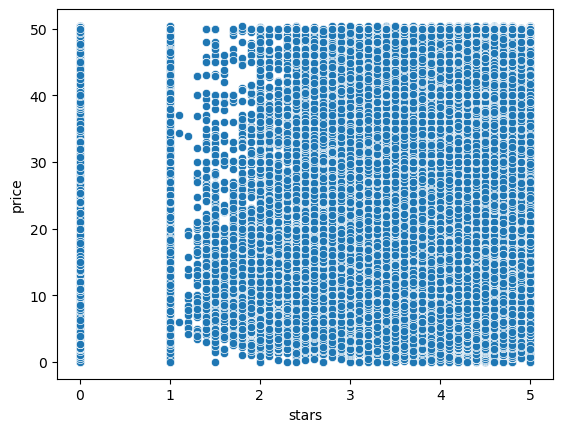

In [82]:
# 2. Visualizations:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

sns.scatterplot(df, x='stars', y='price')

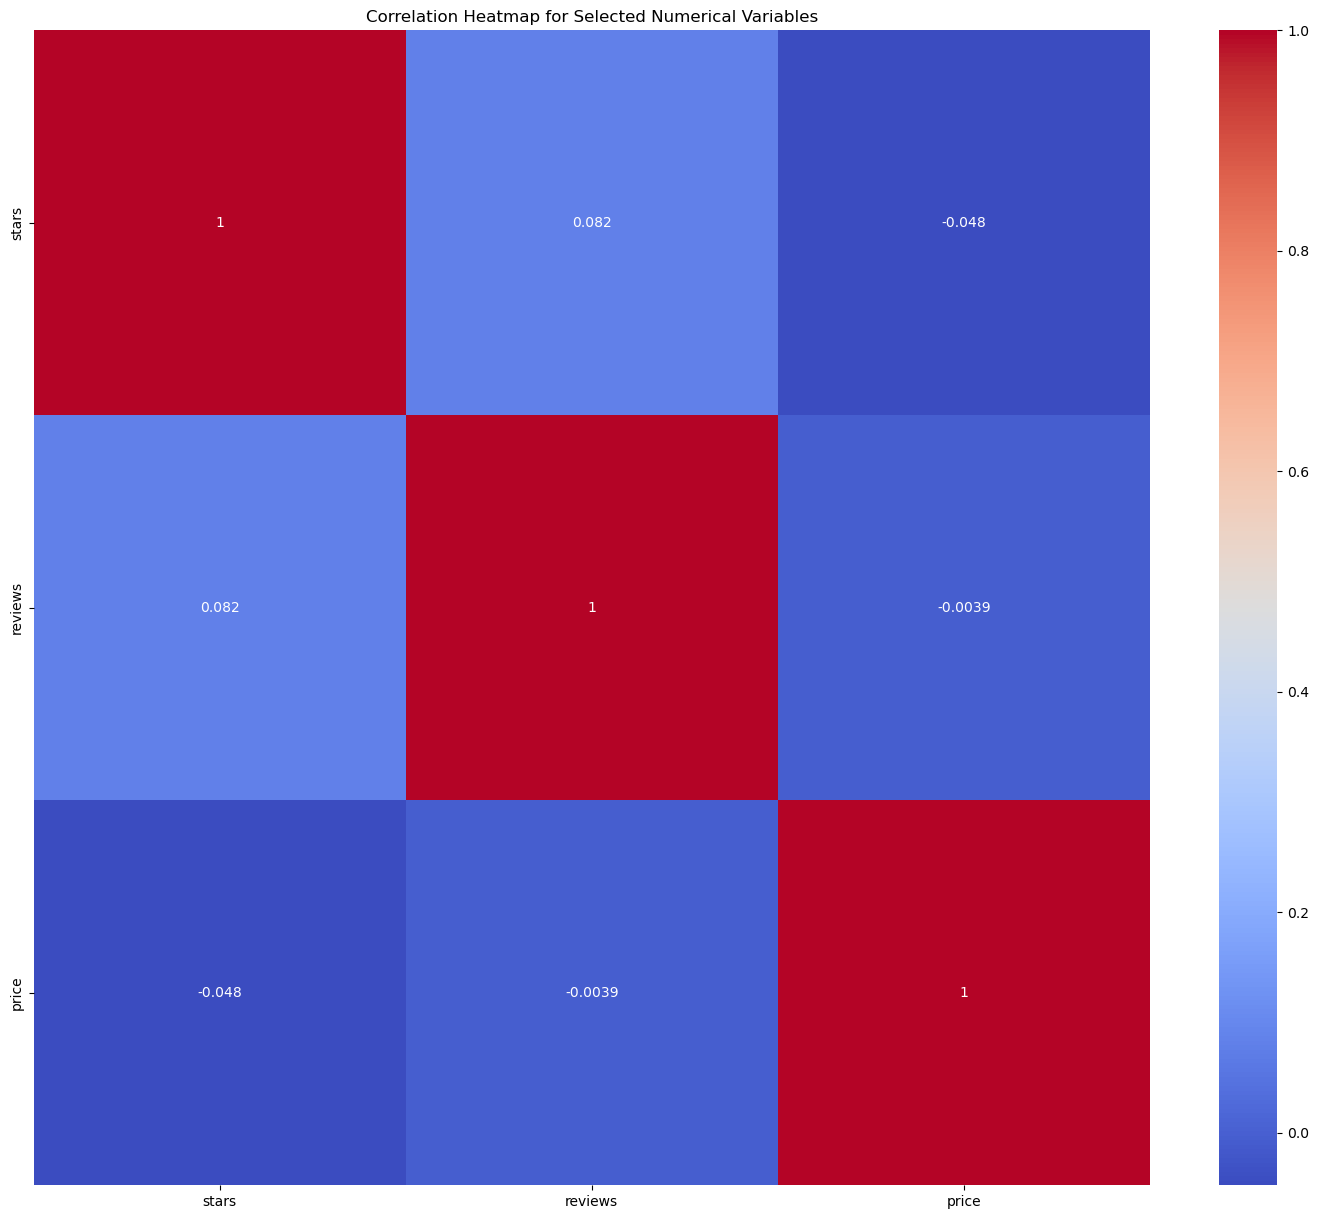

In [84]:
# Use a correlation heatmap to visualize correlations between all numerical variables.

df_numerical = df[['stars', 'reviews', 'price']]
correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

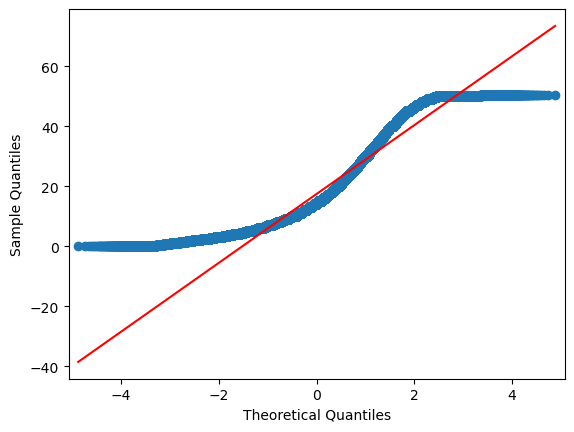

In [85]:
# Examine if product prices typically follow a normal distribution using a QQ plot.

import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(df.price, line='s');